# ConvexGating tutorial

### Load necessary packages for tutorial
Make sure that the required packages are properly installed. For the installation of **ConvexGating** see https://github.com/buettnerlab/convex_gating#installation.

In [1]:
import convexgating as cg
import scanpy as sc
import anndata as ann
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

## Generate toy data set
We generate a toy data set with 5000 observations and 12 features originating from 3 cluster centers. Input file format for **ConvexGating** is **anndata**, see https://anndata.readthedocs.io/.

In [2]:
n_features = 12
X,y = make_blobs(5000, n_features=n_features, centers=3,cluster_std = 3)

var_names = []
for j in range(1,n_features+1):
    var_names.append('feature_' +str(j))
    
adata = ann.AnnData(X=X)
adata.var.index = var_names    

## Clustering
Generate **labels** in an unsupervised fashion via **clustering**, e.g by applying **KMeans algorithm**.

In [3]:
model = KMeans(n_clusters = 4)
model.fit(adata.X)
labels = model.labels_
adata.obs['KMeans'] = [str(i) for i in labels]

## Apply ConvexGating
Find gating strategies for all clusters via **ConvexGating**. As input, **ConvexGating** requires an **anndata object** (adata), a **list** of **cluster identifiers** (cluster_numbers) and the **column name** for the **column** with **label information** in **adata.obs** (KMeans). If necessary, **model hyperparameters** can be adjusted in convex_gating/convex_gating/hyperparameters.py.

           hierarchy_1  hierarchy_2  hierarchy_3  hierarchy_4  hierarchy_5
f1            0.674167     0.736031     0.720559     0.718338     0.720503
recall        0.974699     0.920482     0.869880     0.854217     0.827711
precision     0.515287     0.613162     0.614991     0.619755     0.637883


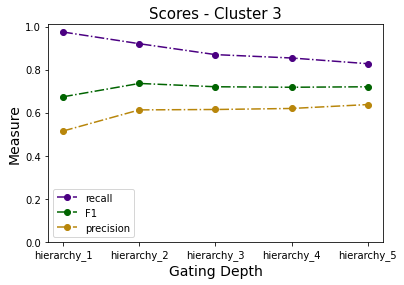

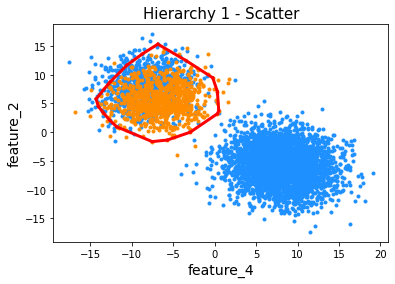

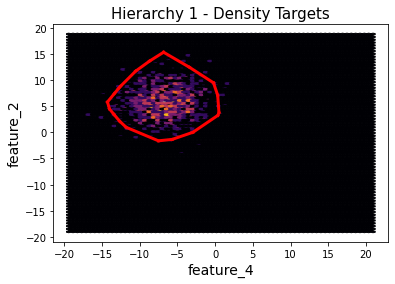

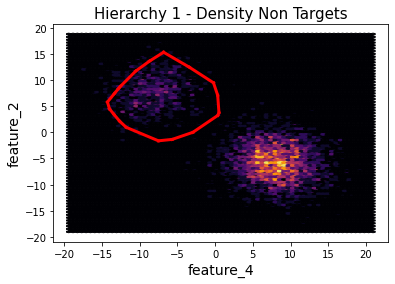

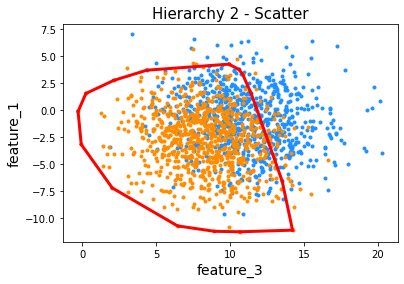

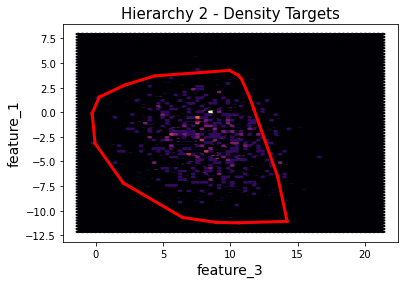

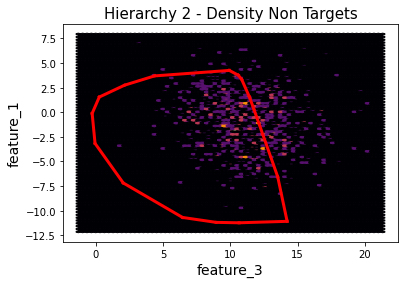

           hierarchy_1  hierarchy_2  hierarchy_3  hierarchy_4  hierarchy_5
f1            0.995198     0.995491     0.995483     0.994878     0.994272
recall        0.995198     0.993998     0.992197     0.990996     0.989796
precision     0.995198     0.996990     0.998792     0.998790     0.998789


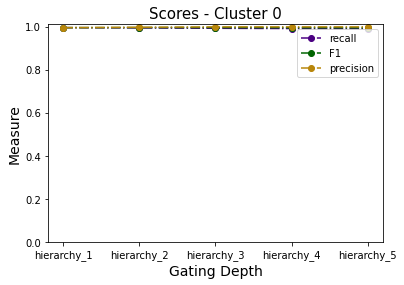

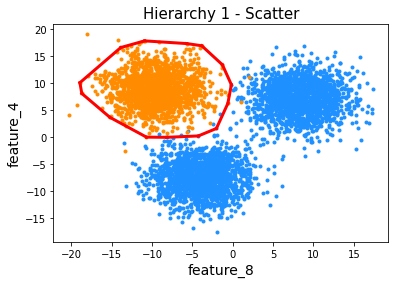

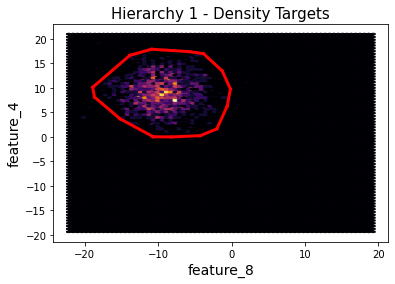

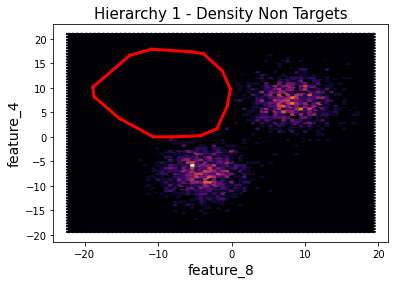

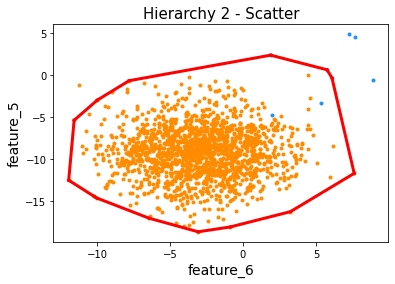

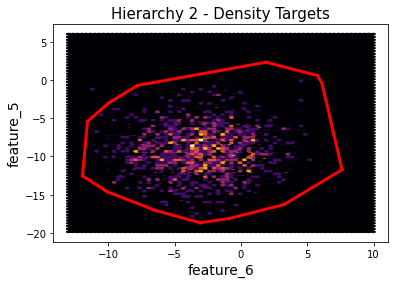

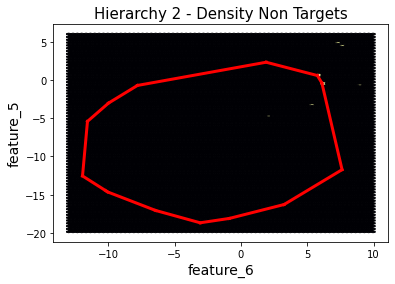

           hierarchy_1  hierarchy_2  hierarchy_3  hierarchy_4  hierarchy_5
f1            0.685185     0.693051     0.696471     0.695694     0.696641
recall        0.972521     0.899642     0.884110     0.859020     0.805257
precision     0.528915     0.563623     0.574534     0.584553     0.613843


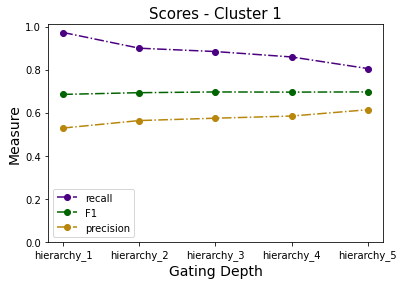

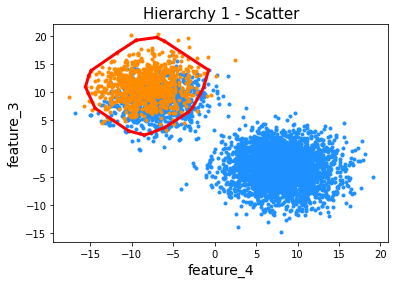

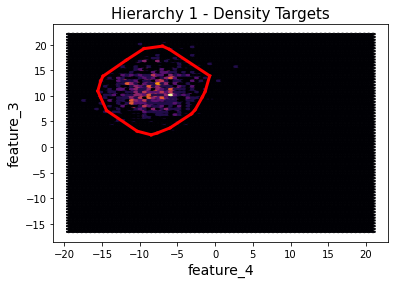

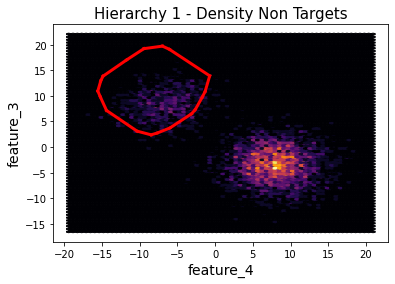

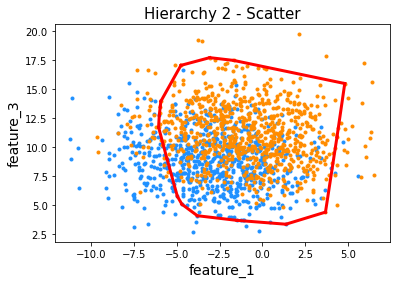

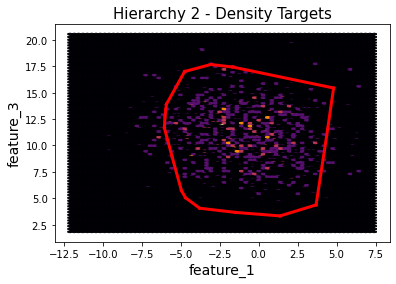

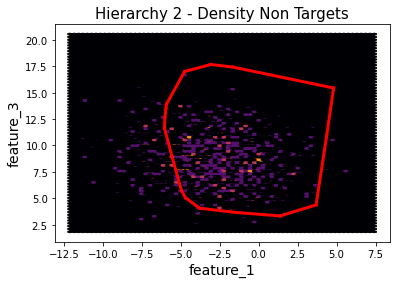

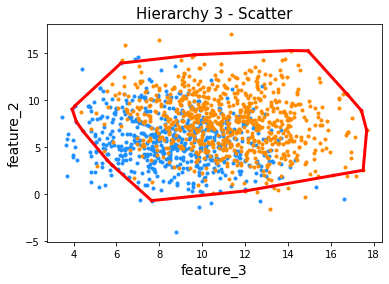

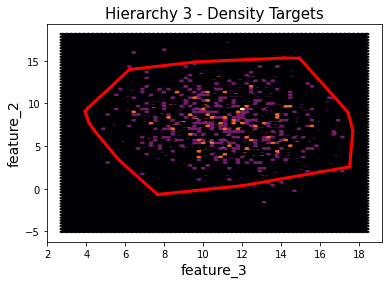

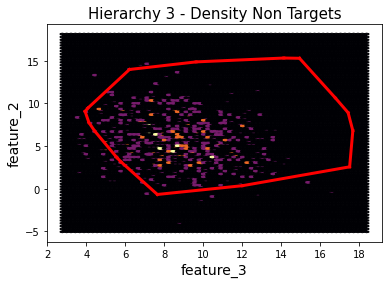

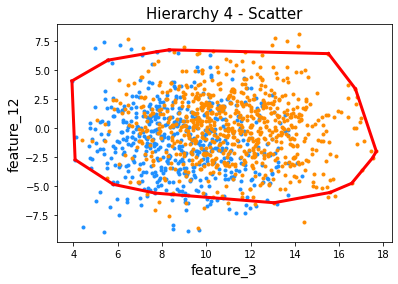

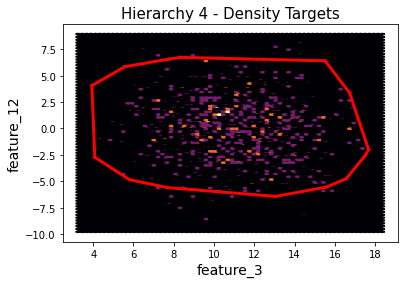

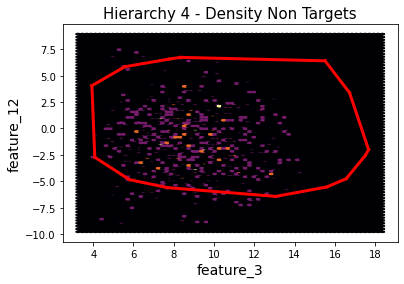

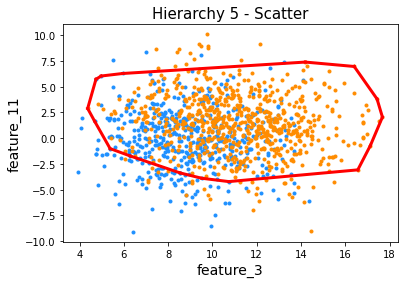

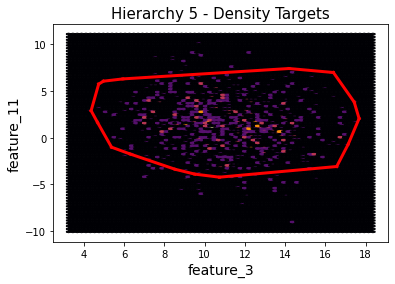

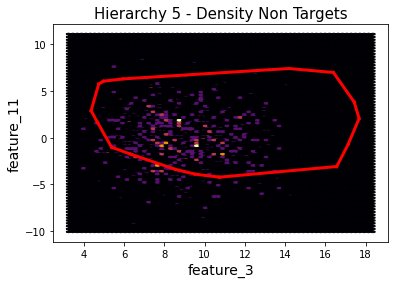

           hierarchy_1  hierarchy_2
f1            0.989228     0.995481
recall        0.991602     0.991002
precision     0.986866     1.000000


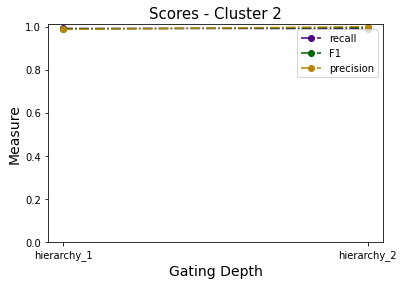

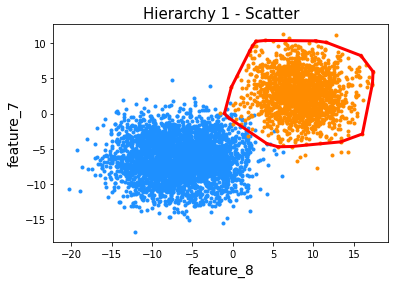

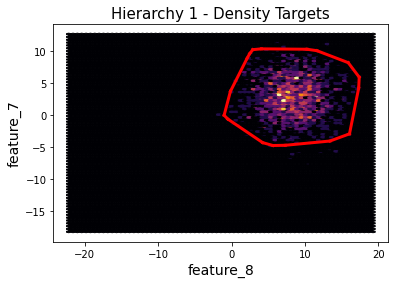

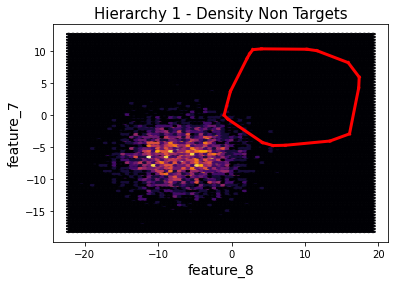

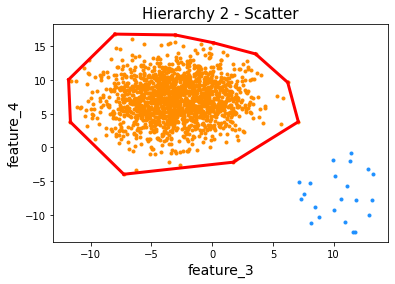

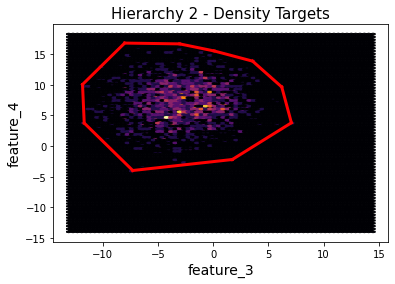

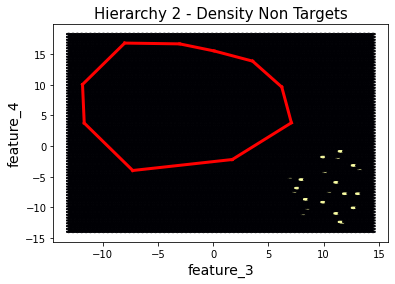

In [4]:
cluster_numbers = pd.unique(adata.obs['KMeans'])
cg.tools.gating_strategy(adata,cluster_numbers,cluster_string = 'KMeans')